# Data import and Install libraries

In [1]:
import sys
import notebook

print("Python version: " + sys.version)
print("Jupyter notebook version: " + notebook.__version__)

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Jupyter notebook version: 5.7.8


In [2]:
# !pip install hyperopt

In [103]:
import re
import math
import random
from datetime import timedelta
# import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from deap import base, creator, tools, algorithms
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# setting to see all the columns
pd.set_option('display.max_columns', None)

In [192]:
# read the file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
print ('Shape of the train dataset is {}.Contains {} rows and {} columns '.format(df_train.shape,df_train.shape[0],df_train.shape[1]))
print ('Shape of the test dataset is {}.Contains {} rows and {} columns '.format(df_test.shape,df_test.shape[0],df_test.shape[1]))

Shape of the train dataset is (165034, 14).Contains 165034 rows and 14 columns 
Shape of the test dataset is (110023, 13).Contains 110023 rows and 13 columns 


In [6]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# EDA

In [7]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df_test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [9]:
df_train[df_train['NumOfProducts'] > 3]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
182,182,15671973,Kesteven,674,Spain,Male,51.0,0,0.00,4,0.0,1.0,145562.40,1
223,223,15589475,Mazzanti,744,Germany,Male,53.0,8,108004.64,4,1.0,0.0,140941.46,1
1030,1030,15679622,Okechukwu,815,France,Male,43.0,4,0.00,4,1.0,1.0,133692.88,1
1257,1257,15670374,Wright,819,Germany,Female,36.0,1,120656.86,4,0.0,0.0,166164.30,1
1590,1590,15682463,Trevisani,706,Germany,Male,46.0,8,133070.11,4,1.0,0.0,79919.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162369,162369,15781326,Ritchie,699,Germany,Female,47.0,7,139753.83,4,0.0,1.0,57921.95,1
163369,163369,15583863,Kosisochukwu,682,Spain,Male,55.0,7,0.00,4,1.0,0.0,186778.89,1
163513,163513,15770091,Mactier,676,France,Female,48.0,4,0.00,4,1.0,0.0,102925.53,1
163549,163549,15595537,Hsia,548,Spain,Female,55.0,5,0.00,4,1.0,0.0,158036.97,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
id                 165034 non-null int64
CustomerId         165034 non-null int64
Surname            165034 non-null object
CreditScore        165034 non-null int64
Geography          165034 non-null object
Gender             165034 non-null object
Age                165034 non-null float64
Tenure             165034 non-null int64
Balance            165034 non-null float64
NumOfProducts      165034 non-null int64
HasCrCard          165034 non-null float64
IsActiveMember     165034 non-null float64
EstimatedSalary    165034 non-null float64
Exited             165034 non-null int64
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [11]:
df_train.groupby('Gender')['Exited'].sum()

Gender
Female    20105
Male      14816
Name: Exited, dtype: int64

In [12]:
df_train.groupby('Geography')['Exited'].sum()

Geography
France     15572
Germany    13114
Spain       6235
Name: Exited, dtype: int64

In [13]:
df_train.groupby(['Geography', 'Gender'])['Exited'].sum()

Geography  Gender
France     Female    9002
           Male      6570
Germany    Female    7596
           Male      5518
Spain      Female    3507
           Male      2728
Name: Exited, dtype: int64

In [14]:
df_train.groupby(['Geography', 'Gender'])['NumOfProducts'].sum()

Geography  Gender
France     Female    62794
           Male      86479
Germany    Female    23361
           Male      26645
Spain      Female    24417
           Male      32842
Name: NumOfProducts, dtype: int64

In [15]:
result = pd.concat([
    df_train.groupby(['Geography', 'Gender'])['Exited'].sum(),
    df_train.groupby(['Geography', 'Gender'])['Exited'].apply(lambda x: x.eq(0).sum())
], axis=1, keys=['Exited_Sum', 'Exited_Zero_Count'])

print(result)

                  Exited_Sum  Exited_Zero_Count
Geography Gender                               
France    Female        9002              30974
          Male          6570              47669
Germany   Female        7596               8792
          Male          5518              12700
Spain     Female        3507              12013
          Male          2728              17965


In [16]:
df_train.groupby('Geography').size().reset_index(name='Geography_Count')

,Geography,Geography_Count
0,France,94215
1,Germany,34606
2,Spain,36213


In [17]:
# Sum of Exited Customers VS Sum of Not-Exited Customers
result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']
result

Exited_Sum  Exited_Zero_Count
Geography Gender                               
France    Female        9002              30974
          Male          6570              47669
Germany   Female        7596               8792
          Male          5518              12700
Spain     Female        3507              12013
          Male          2728              17965

In [18]:
geography_count = df_train.groupby('Geography').size().reset_index(name='Geography_Count')

result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']
result = result.merge(geography_count, on='Geography')

result['Exited_Percentage'] = (result['Exited_Sum'] / result['Geography_Count']) * 100
result

,Geography,Exited_Sum,Exited_Zero_Count,Geography_Count,Exited_Percentage
0,France,9002,30974,94215,9.554742
1,France,6570,47669,94215,6.973412
2,Germany,7596,8792,34606,21.949951
3,Germany,5518,12700,34606,15.945212
4,Spain,3507,12013,36213,9.684367
5,Spain,2728,17965,36213,7.533206


In [19]:
df_train.groupby('Geography').size()

Geography
France     94215
Germany    34606
Spain      36213
dtype: int64

In [20]:
result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']

result['Geography_Count'] = df_train.groupby('Geography').size()
result

Exited_Sum  Exited_Zero_Count  Geography_Count
Geography Gender                                                
France    Female        9002              30974              NaN
          Male          6570              47669              NaN
Germany   Female        7596               8792              NaN
          Male          5518              12700              NaN
Spain     Female        3507              12013              NaN
          Male          2728              17965              NaN

In [21]:
result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']

result['Geography_Count'] = df_train.groupby('Geography')['Geography'].transform('count')
result

Exited_Sum  Exited_Zero_Count  Geography_Count
Geography Gender                                                
France    Female        9002              30974              NaN
          Male          6570              47669              NaN
Germany   Female        7596               8792              NaN
          Male          5518              12700              NaN
Spain     Female        3507              12013              NaN
          Male          2728              17965              NaN

In [22]:
# Groupby 'Exited_Sum' and 'Exited_Zero_Count' of 'Gender' based on 'Geography'
result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']

# Groupby 'Exited_Sum' and 'Exited_Zero_Count' for each category of 'Geography'
result['Geography_Total_Exited_Sum'] = result.groupby('Geography')['Exited_Sum'].transform('sum')
result['Geography_Total_Exited_Zero_Count'] = result.groupby('Geography')['Exited_Zero_Count'].transform('sum')

# 'Exited_Percentage' 
result['Exited_Percentage'] = (result['Exited_Sum'] / result['Geography_Total_Exited_Sum']) * 100
result = result.drop(['Geography_Total_Exited_Sum', 'Geography_Total_Exited_Zero_Count'], axis=1)  
print(result)

                  Exited_Sum  Exited_Zero_Count  Exited_Percentage
Geography Gender                                                  
France    Female        9002              30974          57.808888
          Male          6570              47669          42.191112
Germany   Female        7596               8792          57.922831
          Male          5518              12700          42.077169
Spain     Female        3507              12013          56.246993
          Male          2728              17965          43.753007


In [23]:
result = df_train.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', lambda x: x.eq(0).sum()])
result.columns = ['Exited_Sum', 'Exited_Zero_Count']

# Groupby 'Exited_Sum' and 'Exited_Zero_Count' of 'Gender' based on 'Geography'
result['Geography_Total'] = result.groupby('Geography')['Exited_Sum'].transform('sum')

# 'Exited_Percentage' 
result['Exited_Percentage'] = (result['Exited_Sum'] / result['Geography_Total']) * 100
result = result.drop('Geography_Total', axis=1) 
print(result)

                  Exited_Sum  Exited_Zero_Count  Exited_Percentage
Geography Gender                                                  
France    Female        9002              30974          57.808888
          Male          6570              47669          42.191112
Germany   Female        7596               8792          57.922831
          Male          5518              12700          42.077169
Spain     Female        3507              12013          56.246993
          Male          2728              17965          43.753007


In [24]:
# 2 object types(except for 'Surname') will be converted to neumeric (One hot encoding Maybe)
df_train.dtypes.value_counts()

int64      6
float64    5
object     3
dtype: int64

- Tenure(total duration): Max 10 years >> Not too old product/bank
- Surname will be deleted.
- Geography >> should be encoded/labeled
- Gender >> should be encoded/labeled
- HasCrCard: Max 1 >> Can create more promos and fuctions on credit cards and can promote customer use its cards than other banks.

In [25]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
df_test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## Check duplicate rows by 'CustomerId'
Check duplicate rows by 'CustomerId' that could be a unique id.
There are too many duplicated CustomerId with different names, genders, locations, etc.<br>
So dicide not to keep this feature.

In [206]:
df_train[df_train.duplicated(subset=['CustomerId'], keep=False)].sort_values('CustomerId')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
87277,87277,15565701,Bruno,846,Spain,Male,49.0,8,0.00,2,1.0,1.0,90280.70,0
140882,140882,15565701,Chineze,705,France,Male,32.0,6,107209.58,1,1.0,1.0,129822.79,0
160702,160702,15565701,Ferri,698,France,Female,39.0,2,161993.89,1,1.0,0.0,90212.38,0
93734,93734,15565706,McGregor,564,France,Male,34.0,8,0.00,2,0.0,1.0,53584.03,0
8288,8288,15565706,Akobundu,663,Spain,Male,35.0,4,0.00,1,1.0,1.0,83256.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123836,123836,15815690,Akabueze,614,Spain,Female,40.0,3,113348.50,1,1.0,0.0,77789.01,1
46972,46972,15815690,Tuan,651,Germany,Female,33.0,8,144591.96,1,1.0,1.0,139469.11,0
74247,74247,15815690,Ch'iu,661,Germany,Male,51.0,5,106301.73,1,1.0,0.0,85888.67,1
124621,124621,15815690,Teng,565,France,Male,42.0,7,0.00,2,0.0,1.0,83473.82,0


In [208]:
df_test[df_test.duplicated(subset=['CustomerId'], keep=False)].sort_values('CustomerId')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
53787,218821,15565706,Akobundu,612,France,Male,40.0,1,0.00,1,1.0,0.0,83256.26
20043,185077,15565706,Onyeorulu,545,France,Female,45.0,7,0.00,2,1.0,1.0,127587.22
47395,212429,15565706,Bird,667,France,Male,41.0,6,102945.01,1,1.0,0.0,66214.13
86911,251945,15565706,Hsia,635,France,Male,71.0,2,0.00,2,1.0,1.0,74850.51
15974,181008,15565706,Akobundu,787,Spain,Male,35.0,1,0.00,2,1.0,0.0,83256.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30337,195371,15815660,Tien,757,Spain,Female,20.0,6,0.00,1,1.0,1.0,168035.62
14280,179314,15815690,K'ung,624,Germany,Male,31.0,5,102933.96,2,0.0,0.0,61936.60
24725,189759,15815690,Onyemachukwu,590,France,Male,41.0,8,0.00,1,1.0,0.0,156791.24
70389,235423,15815690,Yobanna,582,France,Female,36.0,6,0.00,2,1.0,1.0,85985.88


In [210]:
# df_train['id'] = df_train.groupby('CustomerId').cumcount() + 1
# df_train['CustomerId'] = df_train['CustomerId'].astype(str) + df_train['id'].astype(str)
# df_train[df_train.duplicated(('CustomerId'), keep=False)].sort_values('CustomerId')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [211]:
# df_test['id'] = df_test.groupby('CustomerId').cumcount() + 1
# df_test['CustomerId'] = df_test['CustomerId'].astype(str) + df_test['id'].astype(str)
# df_test[df_test.duplicated(('CustomerId'), keep=False)].sort_values('CustomerId')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


## Data transformation

In [29]:
# df_train[['Age', 'HasCrCard', 'IsActiveMember']] = df_train[['Age', 'HasCrCard', 'IsActiveMember']].astype('int')
# df_test[['Age', 'HasCrCard', 'IsActiveMember']] = df_test[['Age', 'HasCrCard', 'IsActiveMember']].astype('int')

# Visualisation

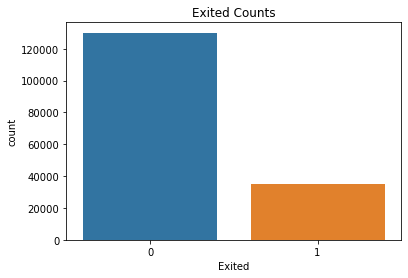

In [33]:
# Bar plot counting Exited
sns.countplot(x='Exited', data=df_train)

# Add a title and Show
plt.title('Exited Counts')
plt.show()

# Many more customers churned to leave.

## Gender

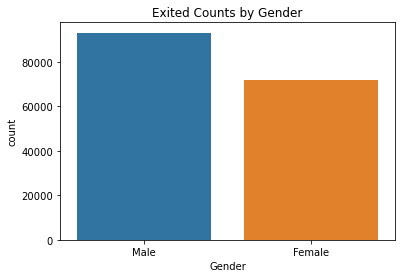

In [34]:
# Bar plot counting Gender
sns.countplot(x='Gender', data=df_train)

# Add a title and Show
plt.title('Exited Counts by Gender')
plt.show()

# No matter customers leave or not, more male customers found this bank.

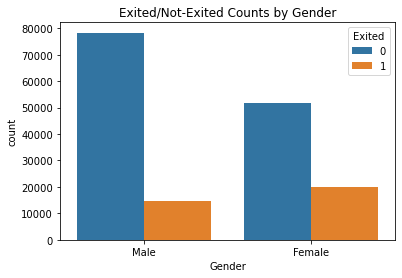

In [35]:
# By Gender
sns.countplot(x='Gender', hue='Exited', data=df_train)

# Add a title and Show
plt.title('Exited/Not-Exited Counts by Gender')
plt.show()

# Still, more males remain not 'Exited'. More females leave than male customers as per ratio.
# Taget group to promote more should be Female gourp.

## Geography

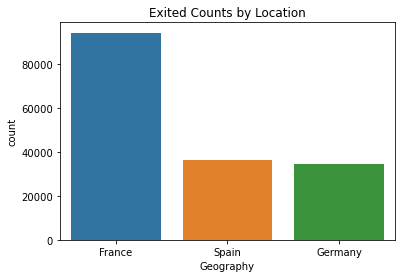

In [36]:
# By Location
sns.countplot(x='Geography', data=df_train)

# Add a title and Show
plt.title('Exited Counts by Location')
plt.show()

# Customers in France use the bank the most and Spain and Germany followed by with no big difference each other.

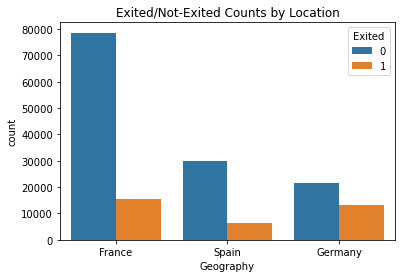

In [37]:
# By Location
sns.countplot(x='Geography', hue='Exited', data=df_train)

# Add a title and Show
plt.title('Exited/Not-Exited Counts by Location')
plt.show()

# However, customers in Spain remain more as per ratio and customers in Germany leave more as per ratio.

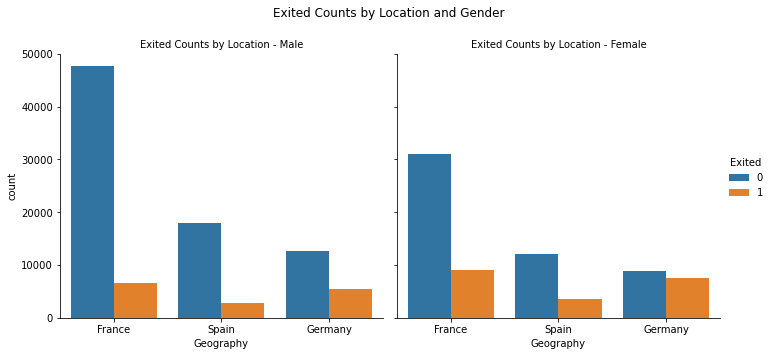

In [38]:
# 'By Geography'
geo = sns.catplot(x='Geography', hue='Exited', col='Gender', data=df_train, kind='count')

# Subtitles
geo.set_titles('Exited Counts by Location - {col_name}')

# Main title and Show
plt.subplots_adjust(top=0.85)
geo.fig.suptitle('Exited Counts by Location and Gender')
plt.show()

# Among them, the 'Exited' rate of female German customers is overwhelmingly high.
# So, we should consider whether this group(Female-German) of people as likely to be a target group or low-value/potential group.

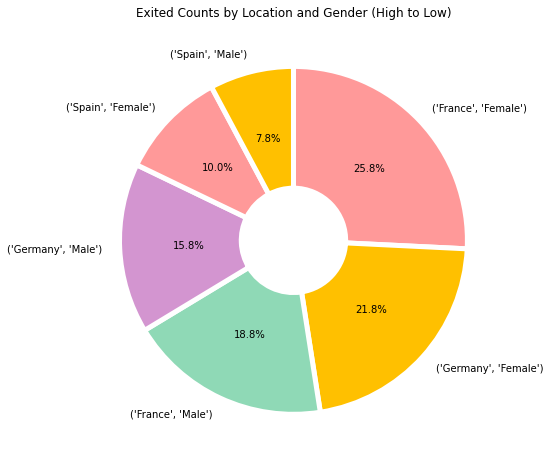

In [39]:
# df with columns of 'Geography', 'Gender' and 'Exited'
pie_data = df_train.groupby(['Geography', 'Gender', 'Exited']).size().unstack()

# Descending sort out: count value of 'Exited'=1
sorted_pie_data = pie_data.sort_values(by=1, ascending=False)

# Pie plot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
labels = sorted_pie_data.index
sizes = sorted_pie_data[1].fillna(0).values if 1 in sorted_pie_data.columns else [0] * len(sorted_pie_data)
# if statement: if there is no column with 'Exited' value of 1
# .values: df -> np array

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

axes.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, wedgeprops=wedgeprops)
axes.set_title('Exited Counts by Location and Gender (High to Low)')

plt.show()

## Number of Products

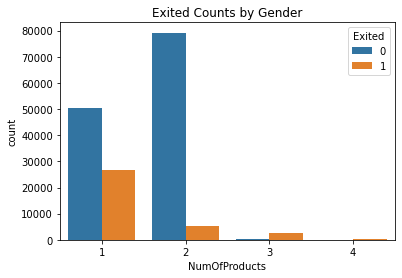

In [40]:
# By NumOfProducts
sns.countplot(x='NumOfProducts', hue='Exited', data=df_train)

# Add a title and Show
plt.title('Exited Counts by Gender')
plt.show()

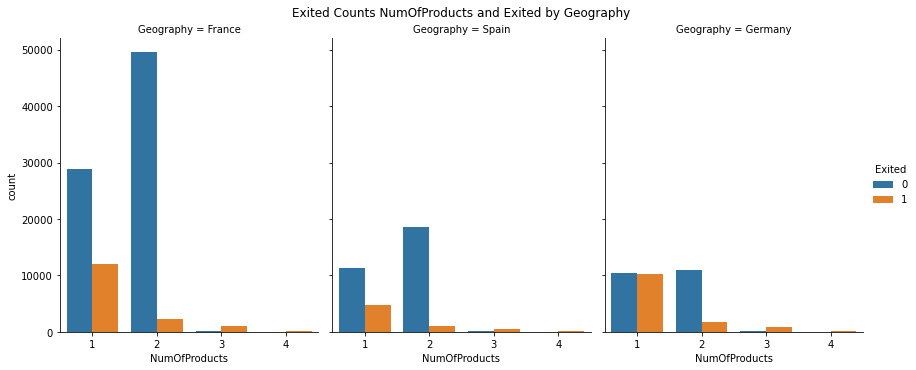

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame
sns.catplot(x='NumOfProducts', hue='Exited', col='Geography', data=df_train, kind='count', height=5, aspect=0.8)

# Add a title
plt.suptitle('Exited Counts NumOfProducts and Exited by Geography', y=1.02)

# Show the plot
plt.show()

## Numerical Data

### Age

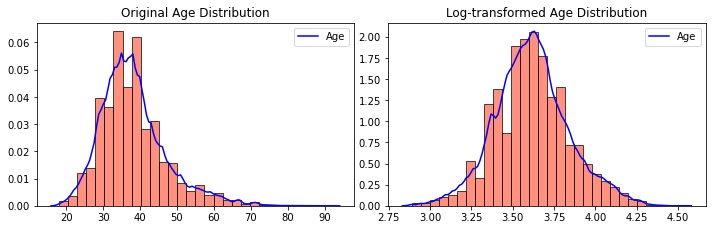

In [42]:
# Original Age Distribution
plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
plt.subplot(2, 2, 1)
plt.hist(df_train['Age'], bins=30, density=True, color='tomato', alpha=0.7, edgecolor='black')
sns.kdeplot(df_train['Age'], color='blue')
plt.title('Original Age Distribution')

# Log-transformed Age Distribution
# plt.subplot(2, 1, 2)
plt.subplot(2, 2, 2)
plt.hist(np.log(df_train['Age']), bins=30, density=True, color='tomato', alpha=0.7, edgecolor='black')
sns.kdeplot(np.log(df_train['Age']), color='blue')
plt.title('Log-transformed Age Distribution')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

### Tenure

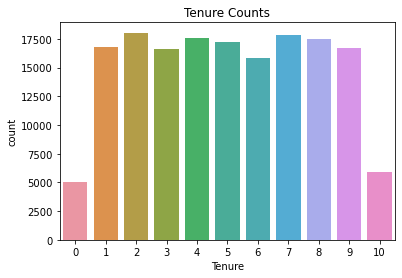

In [43]:
# Bar plot counting Exited
sns.countplot(x='Tenure', data=df_train)

# Add a title and Show
plt.title('Tenure Counts')
plt.show()

### Balance

In [44]:
(df_train['Balance'] == 0).sum()

89648

In [45]:
(df_train['Balance'] != 0).sum()

75386

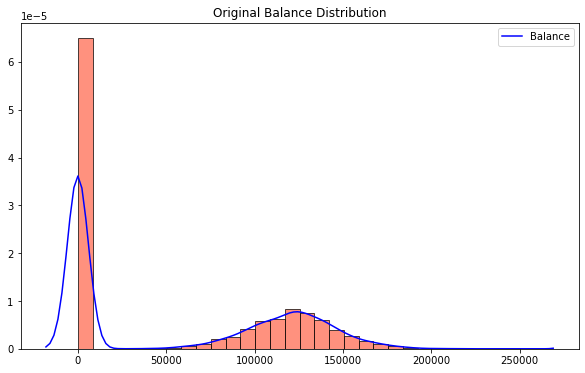

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.hist(df_train['Balance'], bins=30, density=True, color='tomato', alpha=0.7, edgecolor='black')
sns.kdeplot(df_train['Balance'], color='blue')
plt.title('Original Balance Distribution')
# Show the plots
plt.show()

In [47]:
print("Minimum non-zero balance:", df_train[df_train['Balance'] != 0]['Balance'].min())
print("Minimum non-zero balance:", df_train[df_train['Balance'] != 0]['Balance'].max())

Minimum non-zero balance: 18.33
Minimum non-zero balance: 250898.09


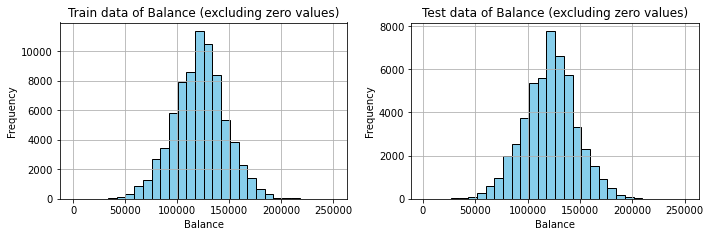

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Train data
non_zero_balance_train = df_train[df_train['Balance'] != 0]['Balance']

plt.subplot(2, 2, 1)
plt.hist(non_zero_balance_train, bins=30, color='skyblue', edgecolor='black')
plt.title('Train data of Balance (excluding zero values)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)

# Test data
non_zero_balance_test = df_test[df_test['Balance'] != 0]['Balance']

plt.subplot(2, 2, 2)
plt.hist(non_zero_balance_test, bins=30, color='skyblue', edgecolor='black')
plt.title('Test data of Balance (excluding zero values)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### CreditScore

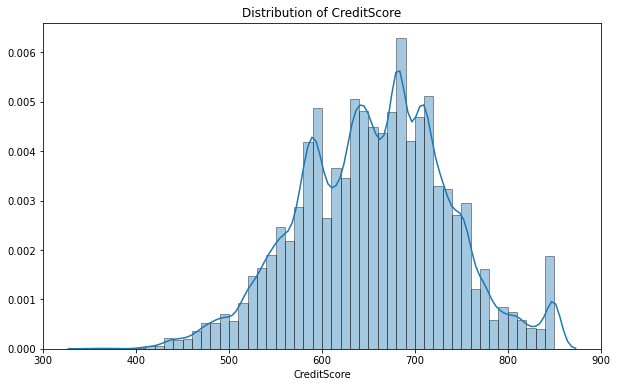

In [49]:
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.distplot(df_train['CreditScore'], hist_kws={'edgecolor':'black'})
# sns.distplot(df_train['CreditScore'], kde=True, color='skyblue', hist_kws={'edgecolor':'black'})

# Add a title
plt.title('Distribution of CreditScore')

plt.show()

### EstimatedSalary

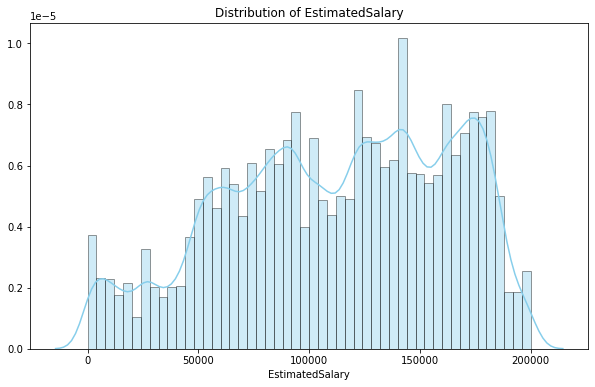

In [50]:
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.distplot(df_train['EstimatedSalary'], kde=True, color='skyblue', hist_kws={'edgecolor':'black'})

# Add a title
plt.title('Distribution of EstimatedSalary')

plt.show()

In [51]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Preprocessing

## Predictors

### Geography & Gender 

In [212]:
# Geography - 'France:0', 'Germany:1', 'Spain:2' 
# Gender - 'Female:0', 'Male:1' 
label_encoder = LabelEncoder()

# Train data 
df_train['Geography'] = label_encoder.fit_transform(df_train['Geography'])
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# Test data 
df_test['Geography'] = label_encoder.fit_transform(df_test['Geography'])
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

In [213]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,156749321,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,157491771,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,1,156945101,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,1,157414171,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,1,157661721,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Age: log transformation

In [214]:
# Train data
df_train['Age'] = np.log(df_train['Age'])

# Test data
df_test['Age'] = np.log(df_test['Age'])

### Balance: Label Encoding

In [215]:
# Train data
df_train['Balance_label'] = pd.cut(df_train['Balance'], 
                                    bins=[-np.inf, 1, 50000, 100000, 150000, 200000, np.inf],
                                    labels=['0', '1~50,000', '50,001~100,000', '100,001~150,000', '150,001~200,000', '200,001~'])

# Mapping
encoding_map = {'0': 0, '1~50,000': 1, '50,001~100,000': 2, '100,001~150,000': 3, '150,001~200,000': 4, '200,001~': 5}
df_train['Balance_label_encoded'] = df_train['Balance_label'].map(encoding_map)
# Encoding
df_train['Balance_label_encoded'] =  label_encoder.fit_transform(df_train['Balance_label_encoded'])
# Print
df_train[['Balance', 'Balance_label', 'Balance_label_encoded']].head()

,Balance,Balance_label,Balance_label_encoded
0,0.00,0,0
1,0.00,0,0
2,0.00,0,0
3,148882.54,"100,001~150,000",3
4,0.00,0,0


In [216]:
# Test data
df_test['Balance_label'] = pd.cut(df_test['Balance'], 
                                    bins=[-np.inf, 1, 50000, 100000, 150000, 200000, np.inf],
                                    labels=['0', '1~50,000', '50,001~100,000', '100,001~150,000', '150,001~200,000', '200,001~'])

# Mapping
encoding_map = {'0': 0, '1~50,000': 1, '50,001~100,000': 2, '100,001~150,000': 3, '150,001~200,000': 4, '200,001~': 5}
df_test['Balance_label_encoded'] = df_test['Balance_label'].map(encoding_map)
# Encoding
df_test['Balance_label_encoded'] =  label_encoder.fit_transform(df_test['Balance_label_encoded'])
# Print
df_test[['Balance', 'Balance_label', 'Balance_label_encoded']].head()

,Balance,Balance_label,Balance_label_encoded
0,0.00,0,0
1,0.00,0,0
2,0.00,0,0
3,0.00,0,0
4,121263.62,"100,001~150,000",3


## Drop columns

In [223]:
# Train data 
df_train.drop(['id', 'CustomerId', 'Surname', 'Balance', 'Balance_label'], axis=1, inplace=True)
# Test data 
df_test.drop(['id', 'CustomerId', 'Surname', 'Balance', 'Balance_label'], axis=1, inplace=True)

## Target value(Imbalance class): ADASYN

In [58]:
y = df_train['Exited']
X = df_train.drop('Exited', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling 'y_train' by ADASYN 
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

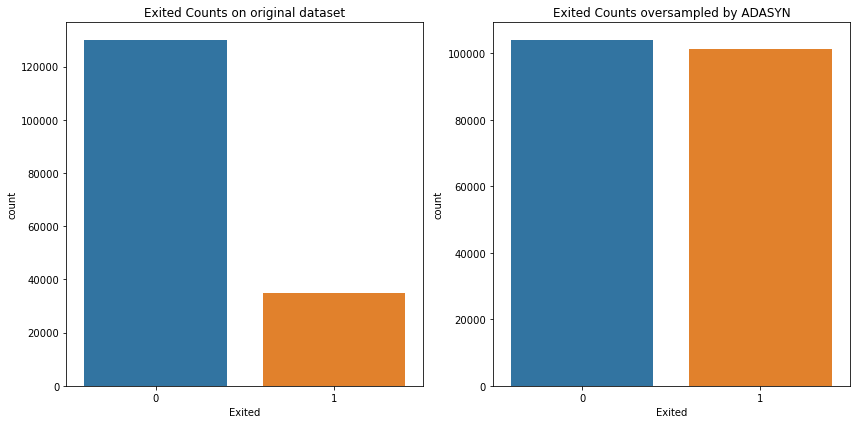

In [59]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(df_train['Exited'], ax=axes[0])
axes[0].set_title('Exited Counts on original dataset')

sns.countplot(y_train, ax=axes[1])
axes[1].set_title('Exited Counts oversampled by ADASYN')

# Show the plot
plt.tight_layout()
plt.show()

# Modelling

## XGBoost: Bayes Optimisation

In [60]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

xgb = XGBClassifier()

param_dist = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9],
    "min_child_weight": [3, 4, 5, 6, 7, 8, 9],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "n_estimators": np.arange(10, 100, 20),  
}

bayes_search = BayesSearchCV(
    xgb,
    search_spaces=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',  
)

bayes_search.fit(X_train, y_train)

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_job...
                                      scale_pos_weight=None, subsample=None,
                                      tree_method=None,
                                      validate_parameters=None,
                                      verbosity=None),
              n_iter=

In [61]:
best_parameters = bayes_search.best_params_
print("Best Parameters for XGBoost Model are:\n\n", best_parameters)

Best Parameters for XGBoost Model are:

 OrderedDict([('colsample_bytree', 0.7), ('gamma', 0.0), ('max_depth', 8), ('min_child_weight', 8), ('n_estimators', 70), ('subsample', 0.9)])


In [62]:
best_xgb = XGBClassifier(**best_parameters)
best_xgb.fit(X_train, y_train)

[10:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print("Accuracy Score on Training Data: ", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Accuracy Score on Testing Data: ", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")

Accuracy Score on Training Data:  91.95 %
Accuracy Score on Testing Data:  86.16 %


In [64]:
print("F1 Score: ", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score: ", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score: ", precision_score(y_test, y_test_pred, average="micro"))

F1 Score:  0.8616354106704638
Recall Score:  0.8616354106704638
Precision Score:  0.8616354106704638


In [65]:
best_parameters = bayes_search.best_params_
print("Best Parameters for XGBoost Model are:\n\n", best_parameters)

Best Parameters for XGBoost Model are:

 OrderedDict([('colsample_bytree', 0.7), ('gamma', 0.0), ('max_depth', 8), ('min_child_weight', 8), ('n_estimators', 70), ('subsample', 0.9)])


## XGBoost: GA optimisation

In [66]:
# def evaluate_GA(idx, x_train, y_train, x_test, y_test):
#     # Extract hyperparameters from the index
#     max_depth = int(idx[0])
#     min_child_weight = idx[1]
#     gamma = idx[2]
#     subsample = min(1.0, max(0.0, idx[3]))  
#     colsample_bytree = min(1.0, max(0.0, idx[4]))
#     n_estimators = int(idx[5])

#     # Create the optimized model with the given hyperparameters
#     model = XGBClassifier(
#         max_depth=max_depth,
#         min_child_weight=min_child_weight,
#         gamma=gamma,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         n_estimators=n_estimators,
#         random_state=42,
#         eval_metric='error',
#         use_label_encoder=False
#     )

#     # Fit the optimized model on the training data
#     model.fit(x_train, y_train)

#     # Make predictions using the optimized model on the test data
#     GA_pred = model.predict(x_test)

#     # Evaluate the model
#     GA_accuracy = accuracy_score(y_test, GA_pred)
#     GA_f1 = f1_score(y_test, GA_pred, average="micro")
#     GA_recall = recall_score(y_test, GA_pred, average="micro")
#     GA_precision = precision_score(y_test, GA_pred, average="micro", zero_division=1)

#     return round(GA_accuracy, 2), round(GA_f1, 2), round(GA_recall, 2), round(GA_precision, 2)

In [67]:
def evaluate_GA(idx, x_train, y_train, x_test, y_test):
    # Convert hyperparameters to integers where necessary
    n_estimators = int(idx[0])
    max_depth = int(idx[2])

    # Create the optimized model with the given hyperparameters
    model = XGBClassifier(
                          n_estimators=n_estimators, 
                          learning_rate=idx[1], 
                          max_depth=max_depth, 
                          gamma=idx[3], 
                          random_state=42,
                          eval_metric='error',
                          use_label_encoder=False
                         )

    # Fit the optimized model on the training data
    model.fit(x_train, y_train)

    # Make predictions using the optimized model on the test data
    GA_pred = model.predict(x_test)

    # Evaluate the model
    GA_accuracy = accuracy_score(y_test, GA_pred)
    GA_f1 = f1_score(y_test, GA_pred, average="micro")
    GA_recall = recall_score(y_test, GA_pred, average="micro")
    GA_precision = precision_score(y_test, GA_pred, average="micro", zero_division=1)

    return round(GA_accuracy, 2), round(GA_f1, 2), round(GA_recall, 2), round(GA_precision, 2)

In [68]:
# def optimize_GA(x_train, y_train, x_test, y_test):
#     # Genetic Algorithm optimization using DEAP
#     creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0, 1.0))
#     creator.create("Individual", list, fitness=creator.FitnessMax)
#     toolbox = base.Toolbox()
#     toolbox.register("attr_float", np.random.uniform, 0.01, 1.0)
#     toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=6)  
#     toolbox.register("population", tools.initRepeat, list, toolbox.individual)
#     toolbox.register("mate", tools.cxTwoPoint)
#     toolbox.register("mutate", tools.mutUniformInt, low=1, up=10, indpb=0.2)
#     toolbox.register("select", tools.selTournament, tournsize=3)
#     toolbox.register("evaluate", evaluate_GA, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

#     # Create the initial population
#     population = toolbox.population(n=100)

#     # Initialize a list to store the best fitness values over generations
#     best_model = None
#     best_accuracy = 0.0

#     # Initialize lists to store performance metrics for plotting
#     accuracy_values = []
#     f1_values = []
#     recall_values = []
#     precision_values = []

#     for gen in range(1, 21):  # Replace 21 with the number of generations you want to run
#         population = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
#         fitness_values = list(map(toolbox.evaluate, population))

#         # Extract evaluation metrics from fitness values
#         accuracy_values.append([ind[0] for ind in fitness_values])
#         f1_values.append([ind[1] for ind in fitness_values])
#         recall_values.append([ind[2] for ind in fitness_values])
#         precision_values.append([ind[3] for ind in fitness_values])

#         # Update best individual and best accuracy
#         best_idx = tools.selBest(population, k=1)[0]
#         if max(accuracy_values[-1]) > best_accuracy:
#             best_accuracy = max(accuracy_values[-1])
#             best_model = XGBClassifier(
#                 n_estimators=int(best_idx[0]),
#                 learning_rate=best_idx[1],
#                 max_depth=int(best_idx[2]),
#                 gamma=best_idx[3],
#                 random_state=42
#             )

#         # Print the best fitness value for each generation
#         print(f"Generation {gen}, Best Accuracy: {max(accuracy_values[-1])}, Best F1 Score: {max(f1_values[-1])}, Best Recall: {max(recall_values[-1])}, Best Precision: {max(precision_values[-1])}")

#     # Plot the progress of optimization over generations
#     gen = range(1, 21)
#     plt.plot(gen, [max(values) for values in accuracy_values], label='Accuracy')
#     plt.plot(gen, [max(values) for values in f1_values], label='F1 Score')
#     plt.plot(gen, [max(values) for values in recall_values], label='Recall')
#     plt.plot(gen, [max(values) for values in precision_values], label='Precision')
#     plt.title("Genetic Algorithm Optimization Progress")
#     plt.xlabel("Generation")
#     plt.ylabel("Performance Metric")
#     plt.legend()
#     plt.show()

#     return best_model

In [85]:
def optimize_GA(x_train, y_train, x_test, y_test):
    # Genetic Algorithm optimization using DEAP
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0.01, 1.0)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=1, up=10, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate_GA, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

    # Create the initial population
    population = toolbox.population(n=100)

    # Initialize a list to store the best fitness values over generations
    accuracy_values = []
    f1_values = []
    recall_values = []
    precision_values = []
    best_model = None
    best_accuracy = 0.0

    for gen in range(1, 21):  # Replace 21 with the number of generations you want to run
        population = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
        fitness_values = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitness_values):
            ind.fitness.values = fit
        best_idx = tools.selBest(population, k=1)[0]

        # Calculate the evaluation metrics for the best individual
        accuracy, f1, recall, precision = evaluate_GA(best_idx, x_train, y_train, x_test, y_test)
        accuracy_values.append(accuracy)
        f1_values.append(f1)
        recall_values.append(recall)
        precision_values.append(precision)

        # Store the best model if its accuracy is higher than the current best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = XGBClassifier(
                n_estimators=int(best_idx[0]),
                learning_rate=best_idx[1],
                max_depth=int(best_idx[2]),
                gamma=best_idx[3],
                random_state=42)

        # Print the best fitness value for each generation
        print(f"Generation {gen}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, Precision: {precision}")

    # Plot the progress of optimization over generations
    gen = range(1, 21)
    plt.plot(gen, accuracy_values, label='Accuracy')
    plt.plot(gen, f1_values, label='F1 Score')
    plt.plot(gen, recall_values, label='Recall')
    plt.plot(gen, precision_values, label='Precision')
    plt.title("Genetic Algorithm Optimization Progress")
    plt.xlabel("Generation")
    plt.ylabel("Performance Metric")
    plt.legend()
    plt.show()

    return best_model

In [2]:
# optimize_GA function running
best_GAmodel = optimize_GA(X_train, y_train, X_test, y_test)

In [71]:
best_GAmodel

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              gamma=0.48329890633789135, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.896507722294917,
              max_delta_step=None, max_depth=6, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=42,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=None,
              verbosity=None)

In [72]:
# Use the best model 
best_GAmodel.fit(X_train, y_train)
train_GA_pred = best_GAmodel.predict(X_train)
GA_pred = best_GAmodel.predict(X_test)

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
print("Accuracy Score on Training Data: ",round(accuracy_score(y_train,train_GA_pred)*100,2),"%")
print("Accuracy Score on Testing Data: ",round(accuracy_score(y_test, GA_pred)*100,2),"%")

Accuracy Score on Training Data:  90.42 %
Accuracy Score on Testing Data:  85.52 %


In [74]:
print("Accuracy Score on Training Data: ",round(accuracy_score(y_train,train_GA_pred)*100,2),"%")
print("Accuracy Score on Testing Data: ",round(accuracy_score(y_test, GA_pred)*100,2),"%")

Accuracy Score on Training Data:  90.42 %
Accuracy Score on Testing Data:  85.52 %


In [75]:
# Evaluation Tools
precision = precision_score(y_test, GA_pred)
recall = recall_score(y_test, GA_pred)
f1 = f1_score(y_test, GA_pred)

# Print the results
print("GA_f1:", f1)
print("GA_recall:", precision)
print("GA_precision:", recall)

GA_f1: 0.6409312805107023
GA_recall: 0.6709119496855346
GA_precision: 0.6135154565061107


In [76]:
# Evaluation Tools
precision = precision_score(y_test, GA_pred)
recall = recall_score(y_test, GA_pred)
f1 = f1_score(y_test, GA_pred)

# Print the results
print("GA_f1:", f1)
print("GA_recall:", precision)
print("GA_precision:", recall)

GA_f1: 0.6409312805107023
GA_recall: 0.6709119496855346
GA_precision: 0.6135154565061107


## CatBoost: Bayes optimisation

In [109]:
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

catboost = CatBoostClassifier()

param_dist = {
    "depth": Integer(3, 9),
    "l2_leaf_reg": Real(0.1, 2.0),
    "subsample": Real(0.05, 1.0),
    "colsample_bylevel": Real(0.05, 1.0),
    "min_data_in_leaf": Integer(1, 100),
    "learning_rate": Real(0.01, 1.0),
    "n_estimators": np.arange(10, 100, 20),  
}

bayes_search = BayesSearchCV(
    estimator=catboost,
    search_spaces=param_dist,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    n_iter=10,   
)

bayes_search.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.3883928	total: 58.5ms	remaining: 5.2s
1:	learn: 0.3238352	total: 120ms	remaining: 5.3s
2:	learn: 0.3040916	total: 168ms	remaining: 4.88s
3:	learn: 0.2881993	total: 213ms	remaining: 4.58s
4:	learn: 0.2826923	total: 259ms	remaining: 4.41s
5:	learn: 0.2753667	total: 308ms	remaining: 4.31s
6:	learn: 0.2696579	total: 358ms	remaining: 4.25s
7:	learn: 0.2675272	total: 406ms	remaining: 4.16s
8:	learn: 0.2633219	total: 452ms	remaining: 4.07s
9:	learn: 0.2617105	total: 502ms	remaining: 4.02s
10:	learn: 0.2612804	total: 547ms	remaining: 3.93s
11:	learn: 0.2589544	total: 594ms	remaining: 3.86s
12:	learn: 0.2583194	total: 640ms	remaining: 3.79s
13:	learn: 0.2569040	total: 691ms	remaining: 3.75s
14:	learn: 0.2555910	total: 748ms	remaining: 3.74s
15:	learn: 0.2539380	total: 802ms	remaining: 3.71s
16:	learn: 0.2530623	total: 853ms	remaining: 3.66s
17:	learn: 0.2507506	total: 910ms	remaining: 3.64s
18:	learn: 0.2466512	total: 958ms	remaining: 3.58s
19:	learn: 0.2458022	total: 1s	remaining: 

BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostClassifier object at 0x000001BCF2EB2160>,
              n_iter=10, n_jobs=-1, scoring='accuracy',
              search_spaces={'colsample_bylevel': Real(low=0.05, high=1.0, prior='uniform', transform='normalize'),
                             'depth': Integer(low=3, high=9, prior='uniform', transform='normalize'),
                             'l2_leaf_reg': Real(low=0.1, high=2.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'min_data_in_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': array([10, 30, 50, 70, 90]),
                             'subsample': Real(low=0.05, high=1.0, prior='uniform', transform='normalize')})

In [110]:
best_parameters = bayes_search.best_params_
print("Best Parameters for CatBoost Model are:\n\n", best_parameters)

catboost = CatBoostClassifier(**best_parameters)
catboost.fit(X_train, y_train)

Best Parameters for CatBoost Model are:

 OrderedDict([('colsample_bylevel', 0.5766424860315361), ('depth', 6), ('l2_leaf_reg', 0.7898289488717465), ('learning_rate', 0.9437594435060811), ('min_data_in_leaf', 26), ('n_estimators', 90), ('subsample', 0.7624977451268609)])
0:	learn: 0.3883928	total: 68.3ms	remaining: 6.08s
1:	learn: 0.3238352	total: 147ms	remaining: 6.48s
2:	learn: 0.3040916	total: 227ms	remaining: 6.6s
3:	learn: 0.2881993	total: 288ms	remaining: 6.19s
4:	learn: 0.2826923	total: 343ms	remaining: 5.83s
5:	learn: 0.2753667	total: 408ms	remaining: 5.71s
6:	learn: 0.2696579	total: 466ms	remaining: 5.53s
7:	learn: 0.2675272	total: 532ms	remaining: 5.45s
8:	learn: 0.2633219	total: 598ms	remaining: 5.38s
9:	learn: 0.2617105	total: 648ms	remaining: 5.18s
10:	learn: 0.2612804	total: 689ms	remaining: 4.95s
11:	learn: 0.2589544	total: 740ms	remaining: 4.81s
12:	learn: 0.2583194	total: 831ms	remaining: 4.92s
13:	learn: 0.2569040	total: 900ms	remaining: 4.88s
14:	learn: 0.2555910	tot

In [113]:
best_parameters = bayes_search.best_params_
print("Best Parameters for CatBoost Model:\n\n", best_parameters)

Best Parameters for CatBoost Model:

 OrderedDict([('colsample_bylevel', 0.5766424860315361), ('depth', 6), ('l2_leaf_reg', 0.7898289488717465), ('learning_rate', 0.9437594435060811), ('min_data_in_leaf', 26), ('n_estimators', 90), ('subsample', 0.7624977451268609)])


In [111]:
y_train_pred = catboost.predict(X_train)
y_test_pred = catboost.predict(X_test)

print("Accuracy Score on Training Data: ", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Accuracy Score on Testing Data: ", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")

Accuracy Score on Training Data:  91.3 %
Accuracy Score on Testing Data:  86.03 %


In [112]:
print("F1 Score: ", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score: ", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score: ", precision_score(y_test, y_test_pred, average="micro"))

F1 Score:  0.8602720635016815
Recall Score:  0.8602720635016815
Precision Score:  0.8602720635016815


## CatBoost: GA optimisation

In [82]:
def evaluate_GA(idx, x_train, y_train, x_test, y_test):
    n_estimators = max(int(idx[0]), 1)  # n_estimators is positive
    learning_rate = max(min(idx[1], 1.0), 0.01)  # learning_rate is between 0.01 and 1.0
    max_depth = int(idx[2])
    l2_leaf_reg = max(idx[3], 0.0)  # l2_leaf_reg is non-negative

    # Create the optimized model with the hyperparameters
    model = CatBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        l2_leaf_reg=l2_leaf_reg,
        eval_metric='Accuracy',
        random_state=42,
        verbose=False
    )

    # Fit the optimized model on the training data
    model.fit(x_train, y_train)

    # Make predictions using the optimized model on the test data
    GA_pred = model.predict(x_test)

    # Evaluate the model
    GA_accuracy = accuracy_score(y_test, GA_pred)
    GA_f1 = f1_score(y_test, GA_pred, average="micro")
    GA_recall = recall_score(y_test, GA_pred, average="micro")
    GA_precision = precision_score(y_test, GA_pred, average="micro", zero_division=1)

    return round(GA_accuracy, 2), round(GA_f1, 2), round(GA_recall, 2), round(GA_precision, 2)

In [83]:
def optimize_GA(x_train, y_train, x_test, y_test):
    # Genetic Algorithm optimization using DEAP
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0.01, 1.0)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=1, up=10, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate_GA, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

    # Create the initial population
    population = toolbox.population(n=100)

    # Initialize a list to store the best fitness values over generations
    accuracy_values = []
    f1_values = []
    recall_values = []
    precision_values = []
    best_model = None
    best_accuracy = 0.0

    for gen in range(1, 21):  # Replace 21 with the number of generations you want to run
        population = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
        fitness_values = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitness_values):
            ind.fitness.values = fit
        best_idx = tools.selBest(population, k=1)[0]

        # Calculate the evaluation metrics for the best individual
        accuracy, f1, recall, precision = evaluate_GA(best_idx, x_train, y_train, x_test, y_test)
        accuracy_values.append(accuracy)
        f1_values.append(f1)
        recall_values.append(recall)
        precision_values.append(precision)

        # Store the best model if its accuracy is higher than the current best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = CatBoostClassifier(
                n_estimators=int(best_idx[0]),
                learning_rate=best_idx[1],
                max_depth=int(best_idx[2]),
                l2_leaf_reg=best_idx[3],  # Add l2_leaf_reg hyperparameter for CatBoost
                random_state=42,
                verbose=False)

        # Print the best fitness value for each generation
        print(f"Generation {gen}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, Precision: {precision}")

    # Plot the progress of optimization over generations
    gen = range(1, 21)
    plt.plot(gen, accuracy_values, label='Accuracy')
    plt.plot(gen, f1_values, label='F1 Score')
    plt.plot(gen, recall_values, label='Recall')
    plt.plot(gen, precision_values, label='Precision')
    plt.title("Genetic Algorithm Optimization Progress")
    plt.xlabel("Generation")
    plt.ylabel("Performance Metric")
    plt.legend()
    plt.show()

    return best_model

In [1]:
# optimize_GA function running
best_GAmodel = optimize_GA(X_train, y_train, X_test, y_test)
best_GAmodel

In [ ]:
# Use the best model
best_GAmodel.fit(X_train, y_train)
train_GA_pred = best_GAmodel.predict(X_train)
GA_pred = best_GAmodel.predict(X_test)

In [ ]:
print("Accuracy Score on Training Data: ",round(accuracy_score(y_train,train_GA_pred)*100,2),"%")
print("Accuracy Score on Testing Data: ",round(accuracy_score(y_test, GA_pred)*100,2),"%")

In [ ]:
# Evaluation Tools
precision = precision_score(y_test, GA_pred)
recall = recall_score(y_test, GA_pred)
f1 = f1_score(y_test, GA_pred)

# Print the results
print("GA_f1:", f1)
print("GA_recall:", precision)
print("GA_precision:", recall)

## ROC curve with a selected best model

In [107]:
def plot_roc_curve(y_actual, y_proba):
    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_actual, y_proba)
    # calculate AUC 
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='tomato', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC(Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

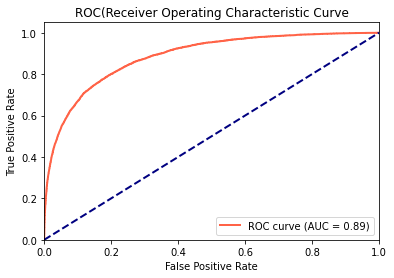

In [108]:
y_proba = xgb.predict_proba(X_test)[:, 1]

# Draw a roc curve
plot_roc_curve(y_test, y_proba)

# Prediction of 'Exited' values on Test data

## Prediction on testing data

In [224]:
df_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_label_encoded
0,157738981,586,0,0,3.135494,2,2,0.0,1.0,160976.75,0
1,157824181,683,0,0,3.828641,2,1,1.0,0.0,72549.27,0
2,158071201,656,0,0,3.526361,7,2,1.0,0.0,138882.09,0
3,158089051,681,0,1,3.583519,8,1,1.0,0.0,113931.57,0
4,156073141,752,1,1,3.637586,10,1,1.0,0.0,139431.00,3
...,...,...,...,...,...,...,...,...,...,...,...
110018,1566209133,570,2,1,3.367296,7,1,1.0,1.0,148087.62,3
110019,157741334,575,0,0,3.583519,4,1,1.0,1.0,42181.68,4
110020,1572845612,712,0,1,3.433987,2,2,1.0,0.0,16287.38,0
110021,156875411,709,0,0,3.465736,3,1,1.0,1.0,158816.58,0


In [225]:
# Predict on testing data for probability of excited values
predictions = xgb.predict_proba(df_test)[:, 1]

In [226]:
# # Round to one decimal place.
# predictions_rounded = [round(pred, 1) for pred in predictions]

## Model Conclusion

- XGBoost performed better than CatBoost
- Bayes Optimisation found better hyperparameters than GA optimisation
- XGBoost with Bayes Optimisation performed better than other combinations.